In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd


### Importing the data for each month

In [2]:
df_jan_path = "../data/raw/yellow_tripdata_2016-01.csv"
df_feb_path = "../data/raw/yellow_tripdata_2016-02.csv"
df_mar_path = "../data/raw/yellow_tripdata_2016-03.csv"

# load the dataframes

df_jan = dd.read_csv(df_jan_path, assume_missing=True)
df_feb = dd.read_csv(df_feb_path, assume_missing=True)
df_mar = dd.read_csv(df_mar_path, assume_missing=True)

In [3]:
df_jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
npartitions=26,,,,,,,,,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


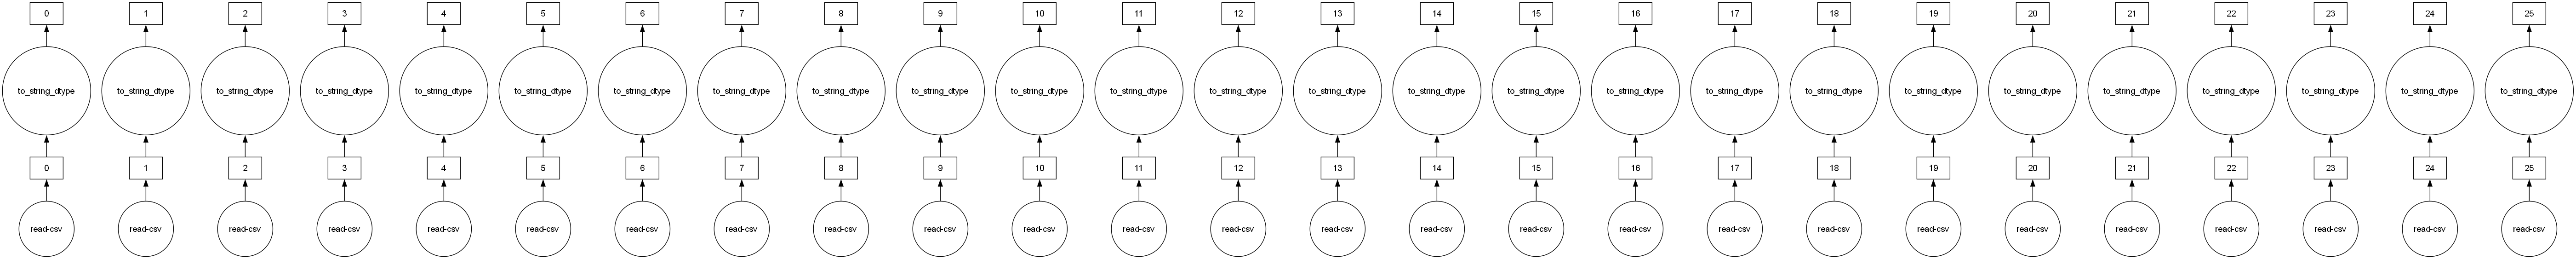

In [4]:
df_jan.visualize(tasks=True)

#### Dask make the data into 25 partitions

In [5]:
# Shape
print("Shape on jan data : ",df_jan.shape)
print("Shape on feb data : ",df_feb.shape)
print("Shape on mar data : ",df_mar.shape)

Shape on jan data :  (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(3ef9a9b)).size() // 19, dtype=int64>, 19)
Shape on feb data :  (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(05c7c46)).size() // 19, dtype=int64>, 19)
Shape on mar data :  (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(59c4053)).size() // 19, dtype=int64>, 19)


### Concating the dataframe into a single dataframe

In [6]:

df=dd.concat([df_jan,df_feb,df_mar],axis=0).drop(columns=["payment_type","fare_amount","extra","mta_tax","tip_amount","tolls_amount","improvement_surcharge","total_amount"])

In [7]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude
npartitions=82,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64
,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...


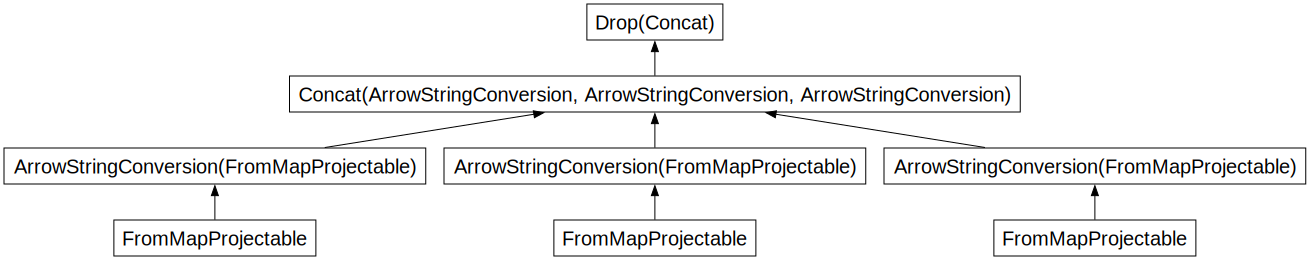

In [8]:
df.visualize()

In [9]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude'],
      dtype='object')

In [10]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude
0,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,2.0,1.10,-73.990372,40.734695,1.0,N,-73.981842,40.732407
1,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,5.0,4.90,-73.980782,40.729912,1.0,N,-73.944473,40.716679
2,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,10.54,-73.984550,40.679565,1.0,N,-73.950272,40.788925
3,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,4.75,-73.993469,40.718990,1.0,N,-73.962242,40.657333
4,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,3.0,1.76,-73.960625,40.781330,1.0,N,-73.977264,40.758514
5,2.0,2016-01-01 00:00:00,2016-01-01 00:18:30,2.0,5.52,-73.980118,40.743050,1.0,N,-73.913490,40.763142
6,2.0,2016-01-01 00:00:00,2016-01-01 00:26:45,2.0,7.45,-73.994057,40.719990,1.0,N,-73.966362,40.789871
7,1.0,2016-01-01 00:00:01,2016-01-01 00:11:55,1.0,1.20,-73.979424,40.744614,1.0,N,-73.992035,40.753944
8,1.0,2016-01-01 00:00:02,2016-01-01 00:11:14,1.0,6.00,-73.947151,40.791046,1.0,N,-73.920769,40.865578
9,2.0,2016-01-01 00:00:02,2016-01-01 00:11:08,1.0,3.21,-73.998344,40.723896,1.0,N,-73.995850,40.688400


In [11]:
df.isnull().sum().compute()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
dtype: int64

#### No Null data present

In [12]:
df.dtypes

VendorID                         float64
tpep_pickup_datetime     string[pyarrow]
tpep_dropoff_datetime    string[pyarrow]
passenger_count                  float64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
dropoff_longitude                float64
dropoff_latitude                 float64
dtype: object

## EDA

In [13]:
sns.set_style("whitegrid")

In [14]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude
npartitions=82,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64
,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...


In [26]:
df.describe().compute()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude
count,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07
mean,1.532576e+00,1.661700e+00,5.309408e+00,-7.283942e+01,4.012605e+01,1.039150e+00,-7.290482e+01,4.016297e+01
std,4.989377e-01,1.316154e+00,4.672575e+03,9.090656e+00,5.007832e+00,5.564537e-01,8.828348e+00,4.863875e+00
min,1.000000e+00,0.000000e+00,-3.390584e+06,-1.616987e+02,-7.703949e+01,1.000000e+00,-1.616987e+02,-7.703949e+01
25%,1.000000e+00,1.000000e+00,1.100000e+00,-7.399055e+01,4.074137e+01,1.000000e+00,-7.399009e+01,4.074001e+01
50%,2.000000e+00,1.000000e+00,1.930000e+00,-7.397922e+01,4.075640e+01,1.000000e+00,-7.397832e+01,4.075612e+01
75%,2.000000e+00,2.000000e+00,3.800000e+00,-7.396252e+01,4.076979e+01,1.000000e+00,-7.395599e+01,4.077166e+01
max,2.000000e+00,9.000000e+00,1.907263e+07,9.464387e+01,6.685682e+01,9.900000e+01,3.889659e+01,4.053167e+02


In [29]:
vendors=df["VendorID"].value_counts(normalize=True).compute()


KeyboardInterrupt



: 

: 

In [ ]:
vendors

In [ ]:
plt.pie(vendors,autopct="%.2f%%",radius=1,wedgeprops=dict(width=0.5,edgecolor="w"))
plt.show()

## Passanges Count

In [15]:
passenger_count=df["passenger_count"].value_counts().compute()

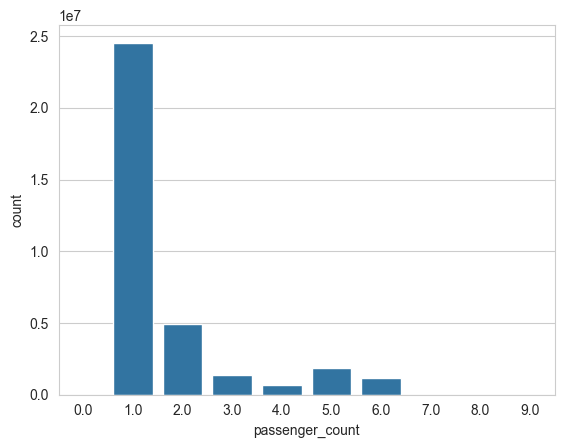

In [16]:
sns.barplot(passenger_count)
plt.show()

* Passenger count value outside the range of 1 to 5 passengers are erroneous and not allowed by the taxi commission in NYC

### Trip Distance

<Axes: ylabel='trip_distance'>

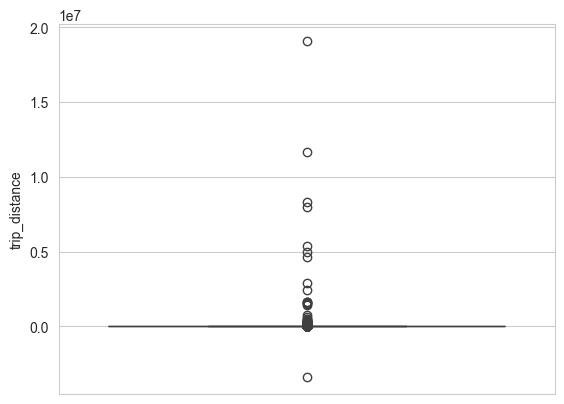

In [18]:
sns.boxplot(df["trip_distance"].compute())

In [20]:
percentile_value=np.arange(0.1,1.0,0.1)


In [21]:
percentile_value

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

### Calculating the persentile of datas

In [22]:
for i in percentile_value:
    p=df["trip_distance"].quantile(i).compute()
    print(f"Distance value for the {i*100} percentile is {p}")

Distance value for the 10.0 percentile is 0.7
Distance value for the 20.0 percentile is 0.97
Distance value for the 30.000000000000004 percentile is 1.23
Distance value for the 40.0 percentile is 1.56
Distance value for the 50.0 percentile is 1.93
Distance value for the 60.0 percentile is 2.49
Distance value for the 70.0 percentile is 3.27
Distance value for the 80.0 percentile is 4.6
Distance value for the 90.0 percentile is 8.3


### There is a outlier persent in between 90-100

In [23]:
pt=np.arange(0.9,1.01,0.01)
print(pt)

[0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]


In [24]:
for i in pt:
    p=df["trip_distance"].quantile(i).compute()
    print(f"Distance value for the {i*100} percentile is {p}")

Distance value for the 90.0 percentile is 8.3
Distance value for the 91.0 percentile is 8.91
Distance value for the 92.0 percentile is 9.53
Distance value for the 93.0 percentile is 10.2
Distance value for the 94.0 percentile is 10.95
Distance value for the 95.0 percentile is 12.1
Distance value for the 96.00000000000001 percentile is 14.680000000000582
Distance value for the 97.00000000000001 percentile is 16.91
Distance value for the 98.00000000000001 percentile is 17.95
Distance value for the 99.00000000000001 percentile is 19.375500000000464
Distance value for the 100.0 percentile is 19072628.8


#### Use the value betwwen 0-.99 percentile to filter out the outliers

## Fare Amount

In [26]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude
npartitions=82,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64
,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
percentile_values = np.arange(0.1,1.1,0.1)
percentile_values

for percentile in percentile_values:
    print(f"The fare amount value for {int(percentile * 100)}th percentile is {df['fare_amount'].quantile(q=percentile).compute()}")

In [ ]:
percentile_values = np.arange(0.90,1.01,0.01)
percentile_values

for percentile in percentile_values:
    print(f"The fare amount value for {int(percentile * 100)}th percentile is {df['fare_amount'].quantile(q=percentile).compute()}")

* Other many columns are not required for our usecases

## Location Based Columns

In [27]:
location_cols=["pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude"]

In [28]:
locations=df[location_cols]

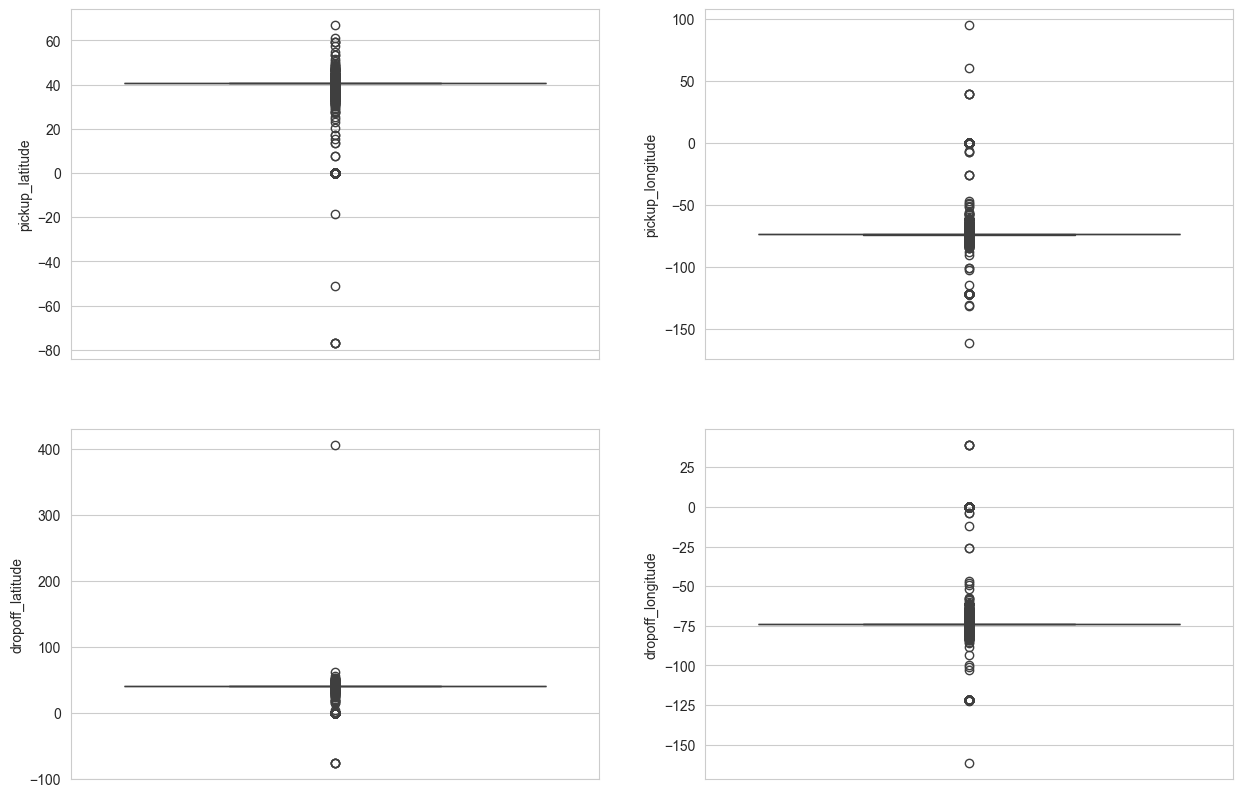

In [29]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
ax=ax.flatten()

for i in range(4):
    sns.boxplot(locations.iloc[:,i].compute(),ax=ax[i])


## store_and_fwd_flag

In [ ]:
sns.countplot(df["store_and_fwd_flag"].compute())

## Datetime Columns

In [30]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude'],
      dtype='object')

In [32]:
datetime_col=["tpep_pickup_datetime","tpep_dropoff_datetime"]

In [33]:
for i in datetime_col:
    df[i]=dd.to_datetime(df[i],yearfirst=True,format="mixed")

In [34]:
df["pickup_month"]=df["tpep_pickup_datetime"].dt.month
df["pickup_day_of_week"]=df["tpep_pickup_datetime"].dt.dayofweek
df["pickup_hour"]=df["tpep_pickup_datetime"].dt.hour


In [36]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day_of_week,pickup_hour
0,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,2.0,1.10,-73.990372,40.734695,1.0,N,-73.981842,40.732407,1,4,0
1,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,5.0,4.90,-73.980782,40.729912,1.0,N,-73.944473,40.716679,1,4,0
2,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,10.54,-73.984550,40.679565,1.0,N,-73.950272,40.788925,1,4,0
3,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,4.75,-73.993469,40.718990,1.0,N,-73.962242,40.657333,1,4,0
4,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,3.0,1.76,-73.960625,40.781330,1.0,N,-73.977264,40.758514,1,4,0
5,2.0,2016-01-01 00:00:00,2016-01-01 00:18:30,2.0,5.52,-73.980118,40.743050,1.0,N,-73.913490,40.763142,1,4,0
6,2.0,2016-01-01 00:00:00,2016-01-01 00:26:45,2.0,7.45,-73.994057,40.719990,1.0,N,-73.966362,40.789871,1,4,0
7,1.0,2016-01-01 00:00:01,2016-01-01 00:11:55,1.0,1.20,-73.979424,40.744614,1.0,N,-73.992035,40.753944,1,4,0
8,1.0,2016-01-01 00:00:02,2016-01-01 00:11:14,1.0,6.00,-73.947151,40.791046,1.0,N,-73.920769,40.865578,1,4,0
9,2.0,2016-01-01 00:00:02,2016-01-01 00:11:08,1.0,3.21,-73.998344,40.723896,1.0,N,-73.995850,40.688400,1,4,0


In [37]:
df.dtypes

VendorID                         float64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                  float64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
dropoff_longitude                float64
dropoff_latitude                 float64
pickup_month                       int32
pickup_day_of_week                 int32
pickup_hour                        int32
dtype: object

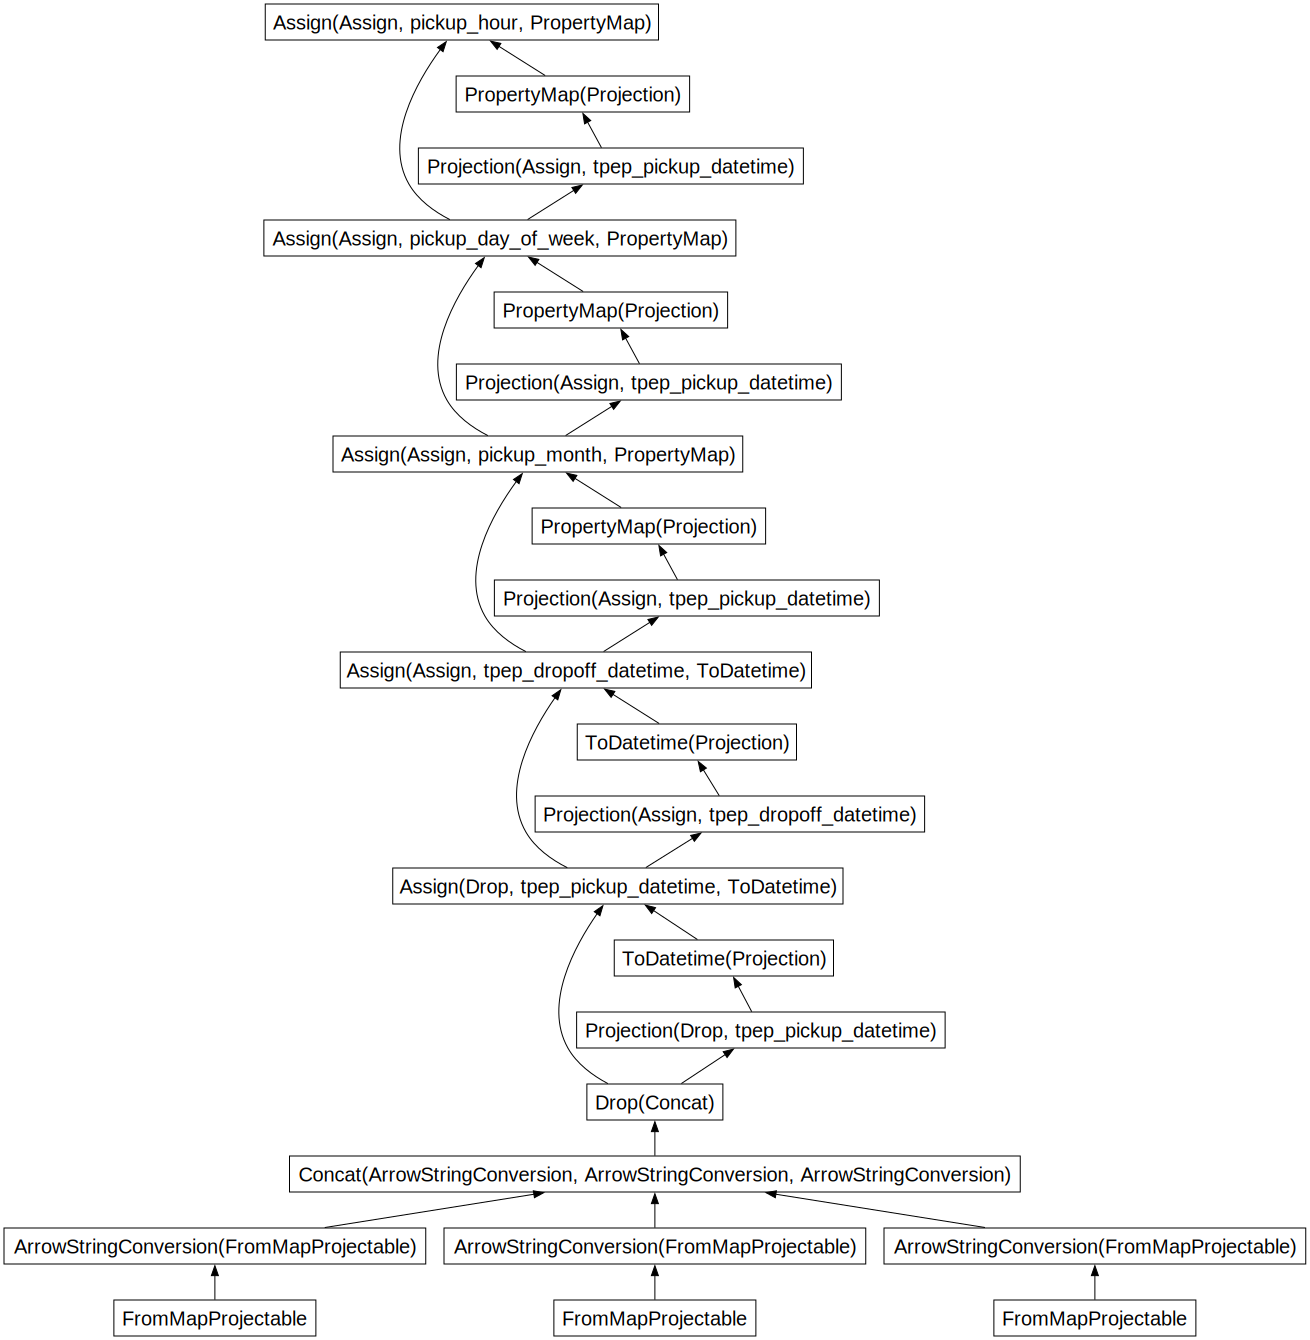

In [46]:
df.visualize() 

In [43]:
pickup_count_3d=df.set_index("tpep_pickup_datetime").resample("3D").size().compute()

In [44]:
pickup_count_3d

tpep_pickup_datetime
2016-01-01     960746
2016-01-04    1007938
2016-01-07    1162789
2016-01-10    1061829
2016-01-13    1192852
2016-01-16    1132536
2016-01-19    1166946
2016-01-22     658061
2016-01-25     968922
2016-01-28    1232734
2016-01-31    1065990
2016-02-03    1176173
2016-02-06    1144752
2016-02-09    1192598
2016-02-12    1285409
2016-02-15    1101217
2016-02-18    1256220
2016-02-21    1114674
2016-02-24    1251497
2016-02-27    1155024
2016-03-01    1208179
2016-03-04    1270530
2016-03-07    1106194
2016-03-10    1273983
2016-03-13    1134075
2016-03-16    1234570
2016-03-19    1176151
2016-03-22    1155525
2016-03-25    1149227
2016-03-28    1108463
2016-03-31     394055
Freq: 3D, dtype: int64

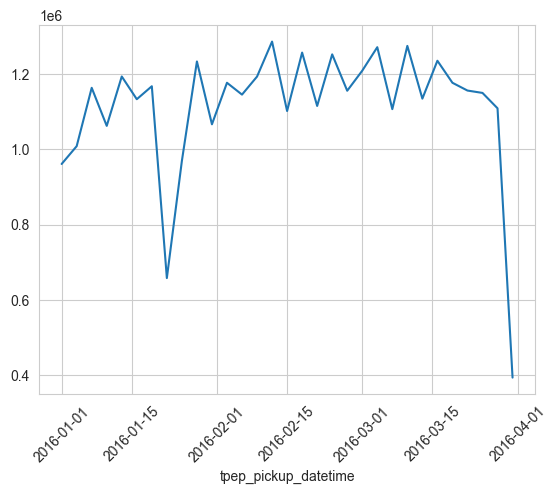

In [45]:
sns.lineplot(pickup_count_3d)
plt.xticks(rotation=45)
plt.show()

In [47]:
# Pick ups in each hour of the day


pickup_hours=df.groupby(["pickup_hour","pickup_day_of_week"])["VendorID"].count().compute(
    
)

In [48]:
pickup_hours

pickup_hour  pickup_day_of_week
4            2                      29498
             3                      32480
5            2                      49844
6            2                     136330
             3                     138392
                                    ...  
23           5                     299024
0            0                     100903
             1                     101299
19           0                     291911
23           0                     154325
Name: VendorID, Length: 168, dtype: int64

In [50]:
pickup_hours=pickup_hours.reset_index()

In [52]:
pickup_hours.rename(columns={"VendorID":"Number_of_pickup"},inplace=True)

In [53]:
pickup_hours

,pickup_hour,pickup_day_of_week,Number_of_pickup
0,4,2,29498
1,4,3,32480
2,5,2,49844
3,6,2,136330
4,6,3,138392
...,...,...,...
163,23,5,299024
164,0,0,100903
165,0,1,101299
166,19,0,291911


In [54]:
day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

replacement_mapper = {k:v for k,v in enumerate(day_names)}

replacement_mapper

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [57]:
pickup_hours["pickup_day_of_week"]=pickup_hours["pickup_day_of_week"].map(replacement_mapper)

In [58]:
pickup_hours

,pickup_hour,pickup_day_of_week,Number_of_pickup
0,4,Wed,29498
1,4,Thu,32480
2,5,Wed,49844
3,6,Wed,136330
4,6,Thu,138392
...,...,...,...
163,23,Sat,299024
164,0,Mon,100903
165,0,Tue,101299
166,19,Mon,291911


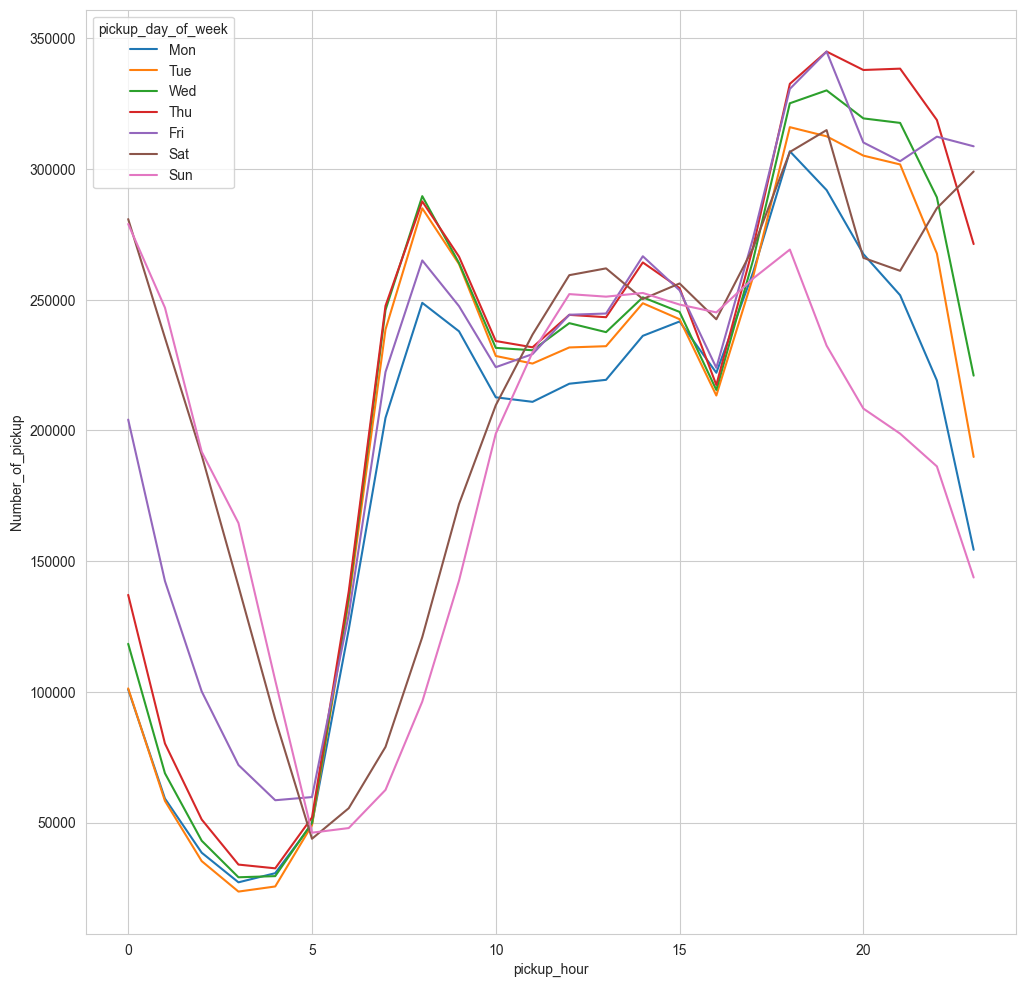

In [63]:
plt.figure(figsize=(12,12))
sns.lineplot(data=pickup_hours,x="pickup_hour",y="Number_of_pickup",hue="pickup_day_of_week",hue_order=day_names)
plt.show()

* all the days except saturday and sunday the total number trips are more
* In saturday and sunday Night trips are high